In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
data = pd.read_csv('Tiempos_promedio.csv')

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'

In [ ]:
variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'
X = data[variables_independientes]
y = data[variable_dependiente]


In [5]:
grado = 2
poly = PolynomialFeatures(degree=grado)
X_poly = poly.fit_transform(X)

In [6]:
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [7]:
y_pred = modelo.predict(X_poly)

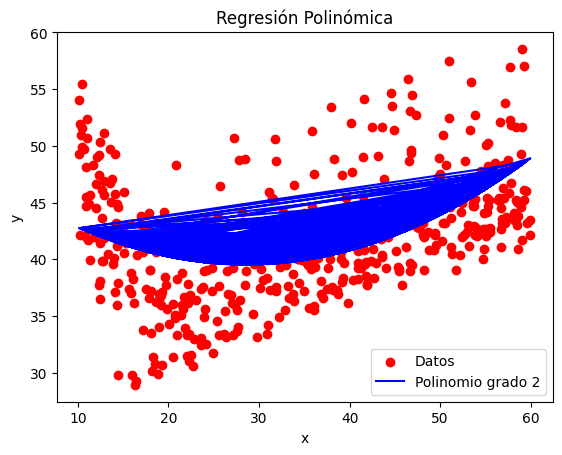

In [8]:
# Graficar
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, y_pred, color='blue', label=f'Polinomio grado {grado}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(mse)
print(r2)

21.01862707532933
0.23420766959371198


In [72]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)
y_pred = modelo.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"La regresión de grado {7} tiene un error cuadrático medio de {mse}")
print(f"La regresión de grado {7} tiene coeficiente de determinación de {r2}")

La regresión de grado 7 tiene un error cuadrático medio de 17.290406318117782
La regresión de grado 7 tiene coeficiente de determinación de 0.3700416064013755


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [20]:
data = pd.read_csv('Tiempos_promedio.csv')

variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'

X = data[variables_independientes]
y = data[variable_dependiente]

In [21]:
modelo = make_pipeline( PolynomialFeatures(degree=2), LinearRegression())

In [22]:
modelo.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [23]:
y_pred= modelo.predict(X)

ValueError: x and y must be the same size

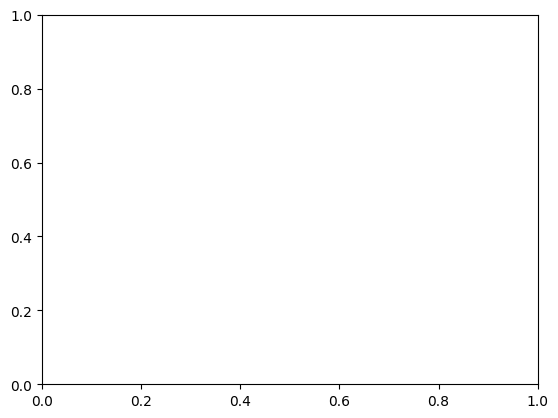

In [25]:
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, y_pred, color='blue', label=f'Polinomio grado {grado}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(mse)
print(r2)

8.95684815326745
0.6736663343517424


In [66]:
lin_reg = modelo.named_steps['linearregression']
poly_feat = modelo.named_steps['polynomialfeatures']

In [67]:
coefs = lin_reg.coef_
intercept = lin_reg.intercept_


In [68]:
feature_names = poly_feat.get_feature_names_out(['GGrr (s)', 'yyrr (s)', 'rrGG (s)', 'rryy (s)'])

In [69]:
feature_names

array(['1', 'GGrr (s)', 'yyrr (s)', 'rrGG (s)', 'rryy (s)', 'GGrr (s)^2',
       'GGrr (s) yyrr (s)', 'GGrr (s) rrGG (s)', 'GGrr (s) rryy (s)',
       'yyrr (s)^2', 'yyrr (s) rrGG (s)', 'yyrr (s) rryy (s)',
       'rrGG (s)^2', 'rrGG (s) rryy (s)', 'rryy (s)^2'], dtype=object)

In [41]:
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef}")
print(f"intercepto: {intercept}")

1: 0.0
GGrr (s): -0.2193355537421668
yyrr (s): -0.6674329409108063
rrGG (s): -0.8558208238283564
rryy (s): 1.3024092598444754
GGrr (s)^2: 0.010578794022021661
GGrr (s) yyrr (s): -0.00026473447558237034
GGrr (s) rrGG (s): -0.008694580561329587
GGrr (s) rryy (s): -0.030561997490134326
yyrr (s)^2: 0.2133522167201488
yyrr (s) rrGG (s): 0.009864744227072477
yyrr (s) rryy (s): -0.18768267901233132
rrGG (s)^2: 0.015012611071414106
rrGG (s) rryy (s): 0.010254734363453344
rryy (s)^2: 0.09193849387259707
intercepto: 50.93410112647011


In [54]:
modelo.predict([[0,0,0,0]])

c:\Users\Erasmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([50.93410113])

50.27099891161361

In [58]:
modelo.predict([[1,1,0,0]])

c:\Users\Erasmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([50.27099891])

In [ ]:
df_test = pd.read_csv('df_test.csv')


In [63]:
variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)']
variable_dependiente = 'Tiempo promedio'
X_test = df_test[variables_independientes]
y_test = df_test[variable_dependiente]

In [64]:
ypred = modelo.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print(mse)
print(r2)

9.993111487948672
0.6401087643946097
